In [1]:
import numpy as np
import cvxpy as cp
from public.basis_generator import rand_moment
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

In [4]:
X = rand_moment(dim=3,
             num_obs=2,
             len_seq=2,
             num_out=3,
             sel_sequences = [2],
             remove_last_out = True)

In [6]:
X.shape

(17, 17)

In [7]:
X = rand_moment(dim=3,
             num_obs=3,
             len_seq=2,
             num_out=3,
             sel_sequences = [2],
             remove_last_out = True)

In [8]:
X.shape

(37, 37)

# Define the Scenario

In [2]:
num_obs = 3
len_seq = 3
out_max = 1
seq_method = "sel_sequences"
remove_last_out = True

In [3]:
sequences = sel_seq(n = num_obs,
                    r = len_seq,
                    out_max = out_max,
                    remove_last_out = remove_last_out)

sequences

[((0, 0, 0), (0, 0, 0)),
 ((0, 0, 0), (0, 0, 1)),
 ((0, 0, 0), (0, 0, 2)),
 ((0, 0, 0), (0, 1, 0)),
 ((0, 0, 0), (0, 1, 1)),
 ((0, 0, 0), (0, 1, 2)),
 ((0, 0, 0), (0, 2, 0)),
 ((0, 0, 0), (0, 2, 1)),
 ((0, 0, 0), (0, 2, 2)),
 ((0, 0, 0), (1, 0, 0)),
 ((0, 0, 0), (1, 0, 1)),
 ((0, 0, 0), (1, 0, 2)),
 ((0, 0, 0), (1, 1, 0)),
 ((0, 0, 0), (1, 1, 1)),
 ((0, 0, 0), (1, 1, 2)),
 ((0, 0, 0), (1, 2, 0)),
 ((0, 0, 0), (1, 2, 1)),
 ((0, 0, 0), (1, 2, 2)),
 ((0, 0, 0), (2, 0, 0)),
 ((0, 0, 0), (2, 0, 1)),
 ((0, 0, 0), (2, 0, 2)),
 ((0, 0, 0), (2, 1, 0)),
 ((0, 0, 0), (2, 1, 1)),
 ((0, 0, 0), (2, 1, 2)),
 ((0, 0, 0), (2, 2, 0)),
 ((0, 0, 0), (2, 2, 1)),
 ((0, 0, 0), (2, 2, 2))]

# Sampling Q3 

In [4]:
dim = 3
sel_sequences = [len_seq]

In [5]:
X = rand_moment(dim, num_obs, len_seq, out_max, seq_method, sel_sequences ,remove_last_out=remove_last_out)
X.shape

(28, 28)

In [ ]:
np.real(np.diag(X))

In [ ]:

sequences = []
for r in list(set(sel_sequences)):
    sequences.append(sel_seq(num_obs, r, out_max=1, remove_last_out=True))
sequences = sum(sequences, [])

rho = rand_rho(dim)

P = []
for k in range(num_obs):
    P_temp = rand_projs(dim, out_max)
    P.append(P_temp)

X = np.eye(len(sequences)+1, dtype=complex)
for i, seq_row in enumerate(sequences):
    Pi = proj_mul([P[k] for k in seq_row[1]], seq_row[0])
    X[0,i+1] = np.trace(Pi @ np.eye(dim) @ rho)
    X[i+1,0] = np.trace(np.eye(dim) @ np.conjugate(Pi.T) @ rho)
    for j, seq_col in enumerate(sequences):
        Pj= proj_mul([P[k] for k in seq_col[1]], seq_col[0])
        X[i+1,j+1] = np.trace(Pi @ np.conjugate(Pj.T) @ rho)
        
X.shape

In [ ]:
np.savetxt("rho.csv", rho, delimiter=",")
rho

In [ ]:
np.savetxt("A1.csv", P[0][0], delimiter=",")
np.savetxt("A2.csv", P[1][0], delimiter=",")
np.savetxt("A3.csv", P[2][0], delimiter=",")

P

# Generate Q2,NPAk set

In [6]:
dim = 2
level = 1
batch_size = 100

In [7]:
X_basis_2d, rank = generate_basis(dim = dim, 
                                  num_obs = num_obs, 
                                  len_seq= len_seq + level - 1,
                                  out_max = out_max,
                                  batch_size = batch_size,
                                  seq_method=seq_method,
                                  sel_sequences = [len_seq, len_seq + level - 1],
                                  remove_last_out=remove_last_out)

print(X_basis_2d[0].shape)
rank

(28, 28)


84

In [8]:
#X_basis_2d = []

for i in range(100):
    X_basis_2d.append(rand_moment(dim, num_obs, len_seq, out_max, seq_method, [len_seq, len_seq + level - 1], remove_last_out=remove_last_out))

eigenvalues:  [ 3.99816115e+00+0.00000000e+00j  7.09601188e-01+0.00000000e+00j
  6.71966500e-01+0.00000000e+00j  5.70205774e-01+0.00000000e+00j
  2.59251622e-01+0.00000000e+00j  2.23893102e-01+0.00000000e+00j
  2.02032963e-01+0.00000000e+00j  6.98536336e-02+0.00000000e+00j
  5.97679247e-02+0.00000000e+00j  3.95671890e-02+0.00000000e+00j
  2.78221063e-02+0.00000000e+00j  2.50616063e-02+0.00000000e+00j
  2.49217370e-03+0.00000000e+00j  2.00968479e-02+0.00000000e+00j
  1.53829472e-02+0.00000000e+00j  1.39557293e-02+0.00000000e+00j
  1.22269972e-02+0.00000000e+00j  1.00780549e-02+0.00000000e+00j
  8.38294738e-03+0.00000000e+00j  8.13553916e-03+0.00000000e+00j
  1.44610362e-16+0.00000000e+00j  7.30892017e-17+0.00000000e+00j
  6.11589728e-17+0.00000000e+00j -4.44866985e-17+0.00000000e+00j
 -3.27860580e-17+4.84557536e-18j -3.27860580e-17-4.84557536e-18j
 -1.03146927e-18+2.87490185e-18j -1.03146927e-18-2.87490185e-18j]
trace : 6.94793599344248


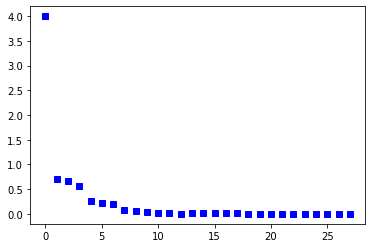

In [9]:
T = np.real(sum(X_basis_2d))/len(X_basis_2d)

vals, vecs = LA.eig(T)

print("eigenvalues: ", vals)
print("trace :", np.trace(T))

plt.plot(np.abs(vals),'bs')
plt.show()


# Testing via SDP

In [11]:
eta = cp.Variable((1, 1))
alpha = cp.Variable((len(X_basis_2d), 1))

#constraints = [eta <= 10]
constraints = [sum([alpha[j]*X_basis_2d[j] for j in range(len(X_basis_2d))]) >> 0]
constraints += [sum([alpha[j]*X_basis_2d[j] for j in range(len(X_basis_2d))])[0,0] == 1]
for i in range(1,len(X)):
    constraints += [
        eta*X[i,i] + (1-eta)*X_basis_2d[0][i,i] == sum([alpha[j]*X_basis_2d[j][i,i] for j in range(len(X_basis_2d))]) 
    ]

prob = cp.Problem(cp.Maximize(eta),
                  constraints)

prob.solve(solver=cp.MOSEK, verbose=True)



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3192            
  Cones                  : 0               
  Scalar variables       : 201             
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3192            
  Cones                  : 0               
  Scalar variables       : 201             
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 3158
Optimizer  - Cones                  : 1
Optimizer  - Scalar variable

0.08433137832265054

In [12]:
alpha = cp.Variable((len(X_basis_2d), 1))
eta = cp.Variable((1, 1))

Gamma = cp.Variable((len(X), len(X)), complex = True)

constraints = [eta <= 10]
constraints += [Gamma >> 0]
constraints += [Gamma[0,0] == 1]
constraints += [Gamma == sum([alpha[j]*X_basis_2d[j] for j in range(len(X_basis_2d))])]

for i in range(1,len(X)):
    constraints += [
        Gamma[i,i] == eta*X[i,i] + (1-eta)/2
    ]

prob = cp.Problem(cp.Maximize(eta),
                  constraints)

prob.solve(solver=cp.MOSEK, verbose=True)



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4761            
  Cones                  : 0               
  Scalar variables       : 1769            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4761            
  Cones                  : 0               
  Scalar variables       : 1769            
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 4526
Optimizer  - Cones                  : 1
Optimizer  - Scalar variable

6.092673290794778e-06

# Random Inequality

In [ ]:
C = np.diag([random.randint(0,1) for i in range(len(X))])

In [ ]:
np.trace(C @ X)

In [ ]:
Gamma = cp.Variable((len(X), len(X)), complex = True)
alpha = cp.Variable((len(X_basis_2d), 1))

constraints = [Gamma >> 0]
constraints += [Gamma[0,0] == 1]
constraints += [ Gamma == sum([alpha[j]*X_basis_2d[j] for j in range(len(X_basis_2d))])]

prob = cp.Problem(cp.Maximize(cp.real(cp.trace(C @ Gamma))),
                  constraints)

prob.solve(verbose=True)

# Compare dimension behavior

In [13]:
num_obs = 3
len_seq = 3
out_max = 1
seq_method = "sel_sequences"
remove_last_out = True

In [29]:
#behavior d=3

dim = 3
B_3d = []

#for i in range(100):
#    X = rand_moment(dim, num_obs, len_seq, out_max, seq_method, [len_seq], remove_last_out=remove_last_out)
#    B_3d.append(np.real(np.diag(X)[1:]))
  
#B_3d = np.array(B_3d) 
#print(B_3d.shape)

#rank = np.linalg.matrix_rank(B_3d)

#rank

X = rand_moment(dim, num_obs, len_seq, out_max, seq_method, [len_seq], remove_last_out=remove_last_out)
B_3d = np.real(np.diag(X)[1:])

B_3d.shape

(27,)

In [31]:
#Convex Hull approximation d=2

dim = 2
B_2d = []

for i in range(100):
    X = rand_moment(dim, num_obs, len_seq, out_max, seq_method, [len_seq], remove_last_out=remove_last_out)
    B_2d.append(np.real(np.diag(X)[1:]))

#B_2d = np.array(B_2d) 
#print(B_2d.shape)

#rank = np.linalg.matrix_rank(B_2d)

#rank

In [32]:
print("Create the LP instance...")
gamma = cp.Variable(B_3d.shape)
Bnd_2d = cp.Variable(1)

constraints = [B_3d @ gamma.T - Bnd_2d <= 1]
for b2d in B_2d:
    constraints += [b2d @ gamma.T - Bnd_2d <= 0]

prob = cp.Problem(cp.Maximize(B_3d @ gamma.T - Bnd_2d),
                  constraints)

print("Solving...")
prob.solve(solver=cp.MOSEK, verbose=True)
Bnd_2d.value

Create the LP instance...
Solving...


Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 101             
  Cones                  : 0               
  Scalar variables       : 28              
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 101             
  Cones                  : 0               
  Scalar variables       : 28              
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the dual        
Optimizer  - Constraints            : 22
Optimizer  - Cones                  :

array([0.98768473])

In [34]:
B_3d @ gamma.value.T - Bnd_2d.value

array([1.])

In [ ]:
#behavior d=3
dim = 3
X = rand_moment(dim, num_obs, len_seq, out_max, seq_method, [len_seq], remove_last_out=remove_last_out)
B_3d = np.real(np.diag(X)[1:])

#Convex Hull approximation d=2
dim = 2
B_2d = []

for i in range(100):
    X = rand_moment(dim, num_obs, len_seq, out_max, seq_method, [len_seq], remove_last_out=remove_last_out)
    B_2d.append(np.real(np.diag(X)[1:]))


#Create the LP instance
gamma = cp.Variable(B_3d.shape)
Bnd_2d = cp.Variable(1)

constraints = [B_3d @ gamma.T - Bnd_2d <= 1]
for b2d in B_2d:
    constraints += [b2d @ gamma.T - Bnd_2d <= 0]

prob = cp.Problem(cp.Maximize(B_3d @ gamma.T - Bnd_2d),
                  constraints)

prob.solve(solver=cp.MOSEK, verbose=True)
print(B_3d @ gamma.value.T - Bnd_2d.value)